# Curve Fitting 

In [95]:
import numpy as np
import matplotlib.pyplot as plt

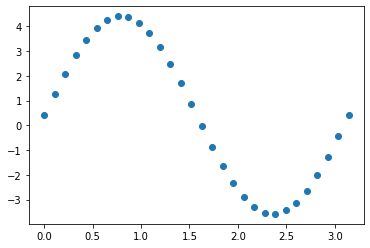

In [96]:
poly_order = 4
# Number of training samples
N = 30
t = np.linspace(0, np.pi, N)
f=1
A=4
# Generate some numbers from the sine function
y = A*np.sin(2*f*t)
# Add noise
y += np.random.RandomState(1).uniform()
#defining it as a matrix
y_1 = np.asmatrix(y.reshape(N,1))
plt.plot(t, y, 'o');
plt.show()

In [97]:
# Numbers from the sine function
y_1.shape

(30, 1)

# Adding the bias and higher order terms to t

In [98]:
B = np.append(np.ones((N,1)),t.reshape((N,1)),axis = 1)
for i in range(0,poly_order-1):
	B = np.append(B,(t.reshape((N,1)))**(i+2),axis = 1)
B = np.asmatrix(B)
print(B.shape)
print(B)

(30, 5)
[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [1.00000000e+00 1.08330781e-01 1.17355581e-02 1.27132218e-03
  1.37723325e-04]
 [1.00000000e+00 2.16661562e-01 4.69422326e-02 1.01705775e-02
  2.20357320e-03]
 [1.00000000e+00 3.24992343e-01 1.05620023e-01 3.43256989e-02
  1.11555893e-02]
 [1.00000000e+00 4.33323125e-01 1.87768930e-01 8.13646196e-02
  3.52571712e-02]
 [1.00000000e+00 5.41653906e-01 2.93388954e-01 1.58915273e-01
  8.60770781e-02]
 [1.00000000e+00 6.49984687e-01 4.22480093e-01 2.74605591e-01
  1.78489429e-01]
 [1.00000000e+00 7.58315468e-01 5.75042349e-01 4.36063508e-01
  3.30673703e-01]
 [1.00000000e+00 8.66646249e-01 7.51075721e-01 6.50916957e-01
  5.64114739e-01]
 [1.00000000e+00 9.74977030e-01 9.50580210e-01 9.26793870e-01
  9.03602735e-01]
 [1.00000000e+00 1.08330781e+00 1.17355581e+00 1.27132218e+00
  1.37723325e+00]
 [1.00000000e+00 1.19163859e+00 1.42000254e+00 1.69212982e+00
  2.01640720e+00]
 [1.00000000e+00 1.29996937e+00 

# Finding the optimum weights

In [99]:
w = (B.T*B).I*B.T*y_1
print(w)

[[-1.50174641e-01]
 [ 1.45528314e+01]
 [-1.35521161e+01]
 [ 2.87584836e+00]
 [ 5.27510674e-12]]


## Error calculating Using Least Square Method Define the error associated to saying $y = w_{n}t + w_0$
> $E(w_{0},w_{1})=\sum_{n=1}^N (y_{n}-(w_{n}t+w))^2 $


In [100]:
y_pred = B * w
y_pred
print(y_pred.shape)

(30, 1)


In [101]:
def LSE_error(y_pred,y_1):
  var = (y_1-y_pred)
  n = len(var)
  MSE= np.asmatrix(y_1-y_pred).T*np.asmatrix(y_1-y_pred)
  MSE = (MSE/n)
  return MSE

In [102]:
error1 = LSE_error(y_1,y_pred)
print(error1)

[[0.08882154]]


# Ploting the curves

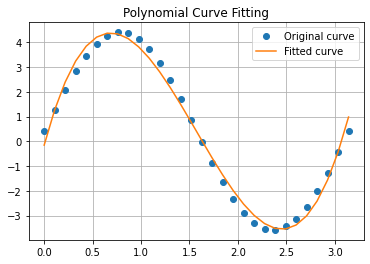

In [103]:
plt.plot(t,y_1,'o',label = 'Original curve')
plt.plot(t,y_pred,label = 'Fitted curve')
plt.legend()
plt.grid()
plt.title("Polynomial Curve Fitting")
plt.show()